In [1]:
# Data analysis of the Top 1000 Twitch Streamers (May 2024)
# Objective: Explore factors that influence streamers' success (followers, audience, etc.).
# Dataset: Include variables such as language, most streamed game, streaming time, followers, etc.

# ---
# 1. Loading of libraries and data
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/top-1000-twitch-streamers-data-may-2024/datasetV2.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Load dataset
df = pd.read_csv('/kaggle/input/top-1000-twitch-streamers-data-may-2024/datasetV2.csv')

In [4]:
# See structure and variables

print(df.head())

   RANK      NAME LANGUAGE         TYPE              MOST_STREAMED_GAME  \
0     1  kaicenat  English  personality                   Just Chatting   
1     2    jynxzi  English  personality  Tom Clancy's Rainbow Six Siege   
2     3   caedrel  English  personality               League of Legends   
3     4   caseoh_  English  personality                        NBA 2K23   
4     5      ibai  Spanish  personality                   Just Chatting   

  2ND_MOST_STREAMED_GAME  AVERAGE_STREAM_DURATION  \
0      I'm Only Sleeping                      7.6   
1               NBA 2K20                      5.4   
2      I'm Only Sleeping                      6.3   
3          Just Chatting                      4.6   
4      League of Legends                      4.1   

   FOLLOWERS_GAINED_PER_STREAM  AVG_VIEWERS_PER_STREAM  AVG_GAMES_PER_STREAM  \
0                        18405                   15852                   2.3   
1                         3386                    1145                

In [5]:
# 2. Initial exploration

# Initial hypothesis: 
# - English dominates as the main language.
# - Games like 'League of Legends' or 'Fortnite' will be the most streamed.
# - Variables such as time streamed and viewers are correlated with followers.


print("General dataset information:")
print(df.info())

General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RANK                            999 non-null    int64  
 1   NAME                            999 non-null    object 
 2   LANGUAGE                        999 non-null    object 
 3   TYPE                            999 non-null    object 
 4   MOST_STREAMED_GAME              999 non-null    object 
 5   2ND_MOST_STREAMED_GAME          922 non-null    object 
 6   AVERAGE_STREAM_DURATION         999 non-null    float64
 7   FOLLOWERS_GAINED_PER_STREAM     999 non-null    int64  
 8   AVG_VIEWERS_PER_STREAM          999 non-null    int64  
 9   AVG_GAMES_PER_STREAM            999 non-null    float64
 10  TOTAL_TIME_STREAMED             999 non-null    int64  
 11  TOTAL_FOLLOWERS                 999 non-null    int64  
 12  TOTAL_V

In [6]:
print("\nDescriptive statistics:")
print(df.describe())



Descriptive statistics:
              RANK  AVERAGE_STREAM_DURATION  FOLLOWERS_GAINED_PER_STREAM  \
count   999.000000               999.000000                   999.000000   
mean    500.972973                 5.996697                  3383.445445   
std     288.576373                 3.241013                  2742.696216   
min       1.000000                 1.200000                 -4240.000000   
25%     251.500000                 4.200000                  1360.500000   
50%     501.000000                 5.400000                  2450.000000   
75%     750.500000                 6.900000                  4831.500000   
max    1000.000000                23.900000                 18889.000000   

       AVG_VIEWERS_PER_STREAM  AVG_GAMES_PER_STREAM  TOTAL_TIME_STREAMED  \
count              999.000000            999.000000           999.000000   
mean             19595.082082              1.477878          6504.741742   
std              43241.584073              0.575189          6

In [7]:
# 3. Language analysis

print("\nLanguage distribution:")
language_distribution = df['LANGUAGE'].value_counts()
print(language_distribution) # English dominates with 63% of streamers, reflecting its global reach on Twitch.  
# Russian and Spanish follow, showing strong regional communities.  
# Portuguese and Japanese have a notable presence but lag behind English.  
# Smaller languages indicate niche audiences or lower Twitch adoption.


Language distribution:
LANGUAGE
English       401
Russian       115
Spanish       106
Portuguese     82
Japanese       79
French         72
German         60
Chinese        28
Polish         18
Italian        13
Turkish         7
Thai            5
Ukrainian       3
Czech           3
Korean          2
Cantonese       2
Hungarian       1
Romanian        1
Arabic          1
Name: count, dtype: int64


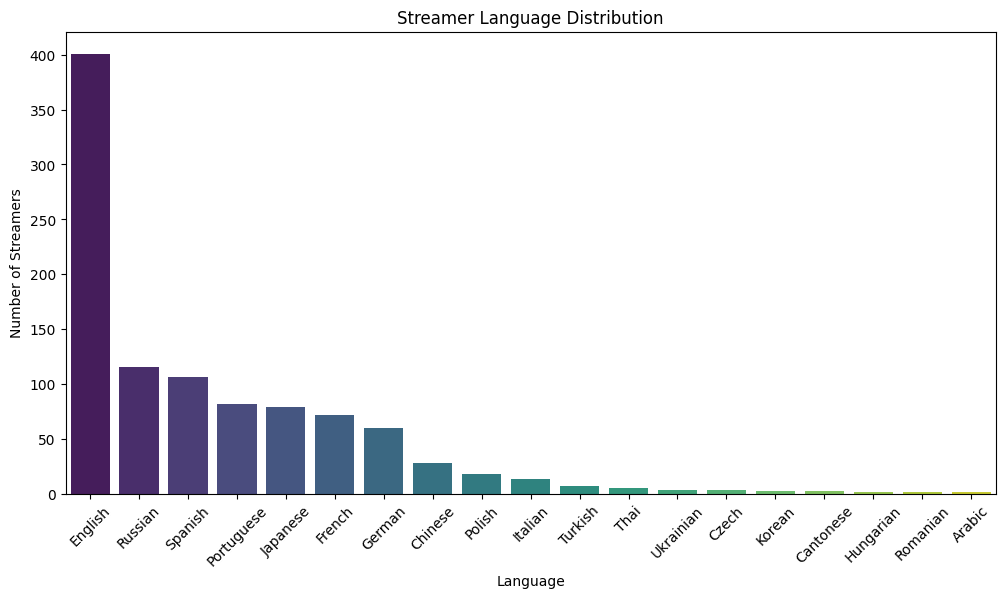

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x=language_distribution.index, y=language_distribution.values, palette="viridis")
plt.title('Streamer Language Distribution')
plt.xlabel('Language')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45)
plt.show()


In [9]:
# 4. Most transmitted categories

print("\nTop 10 most transmitted categories:")
most_streamed_games = df['MOST_STREAMED_GAME'].value_counts().head(10)
print(most_streamed_games)   

# "Just Chatting" leads by a wide margin, showing Twitch’s shift beyond gaming.  
# Competitive games like LoL, GTA V, and VALORANT dominate, reflecting esports popularity.  
# Casino-related categories have a strong presence, indicating a growing niche.  
# Classic titles like Minecraft and Counter-Strike remain relevant among streamers. 


Top 10 most transmitted categories:
MOST_STREAMED_GAME
Just Chatting         257
League of Legends      84
Grand Theft Auto V     74
VALORANT               60
Casino                 36
Fortnite               35
Dota 2                 35
Counter-Strike         31
Minecraft              24
Virtual Casino         23
Name: count, dtype: int64


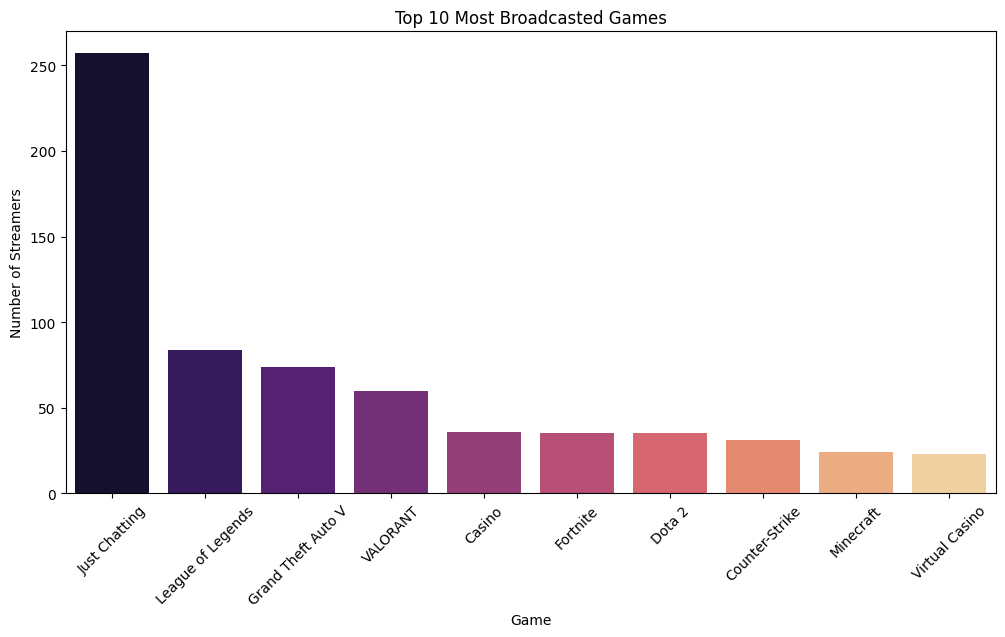

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=most_streamed_games.index, y=most_streamed_games.values, palette="magma")
plt.title('Top 10 Most Broadcasted Games')
plt.xlabel('Game')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45)
plt.show()


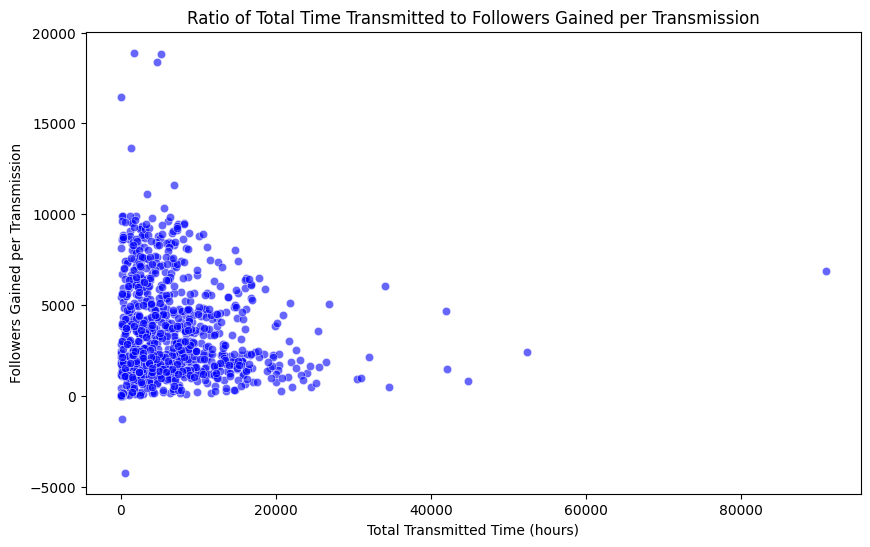

In [11]:
# Relationship between key variables
# ---
# Hypothesis: Streamers with more hours transmitted gain more followers per stream.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOTAL_TIME_STREAMED', y='FOLLOWERS_GAINED_PER_STREAM', data=df, alpha=0.6, color='blue')
plt.title('Ratio of Total Time Transmitted to Followers Gained per Transmission')
plt.xlabel('Total Transmitted Time (hours)')
plt.ylabel('Followers Gained per Transmission')
plt.show()   # Comment:
# No clear correlation between hours streamed and followers gained per stream.
# The high dispersion suggests that more hours do not guarantee more followers.
# Factors such as engagement, content quality or virality may be more determinant.

In [12]:
print("\nCorrelation matrix:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)   # Key Findings:  
# The average viewers per stream moderately correlate with total followers (0.42) and total views (0.57).  
# This suggests that attracting more viewers per stream can drive channel growth.  
# However, total time streamed has a weak correlation with followers gained (-0.07),  
# indicating that streaming more hours is not the main factor in gaining an audience.  


Correlation matrix:
                                 RANK  AVERAGE_STREAM_DURATION  \
RANK                         1.000000                 0.008177   
AVERAGE_STREAM_DURATION      0.008177                 1.000000   
FOLLOWERS_GAINED_PER_STREAM -0.185244                -0.157805   
AVG_VIEWERS_PER_STREAM      -0.263267                 0.089485   
AVG_GAMES_PER_STREAM        -0.139887                 0.122828   
TOTAL_TIME_STREAMED         -0.067834                 0.360657   
TOTAL_FOLLOWERS             -0.330846                -0.065234   
TOTAL_VIEWS                 -0.271250                 0.131747   
TOTAL_GAMES_STREAMED        -0.111584                 0.056271   
ACTIVE_DAYS_PER_WEEK        -0.052343                 0.191241   

                             FOLLOWERS_GAINED_PER_STREAM  \
RANK                                           -0.185244   
AVERAGE_STREAM_DURATION                        -0.157805   
FOLLOWERS_GAINED_PER_STREAM                     1.000000   
AVG_VIEWERS_

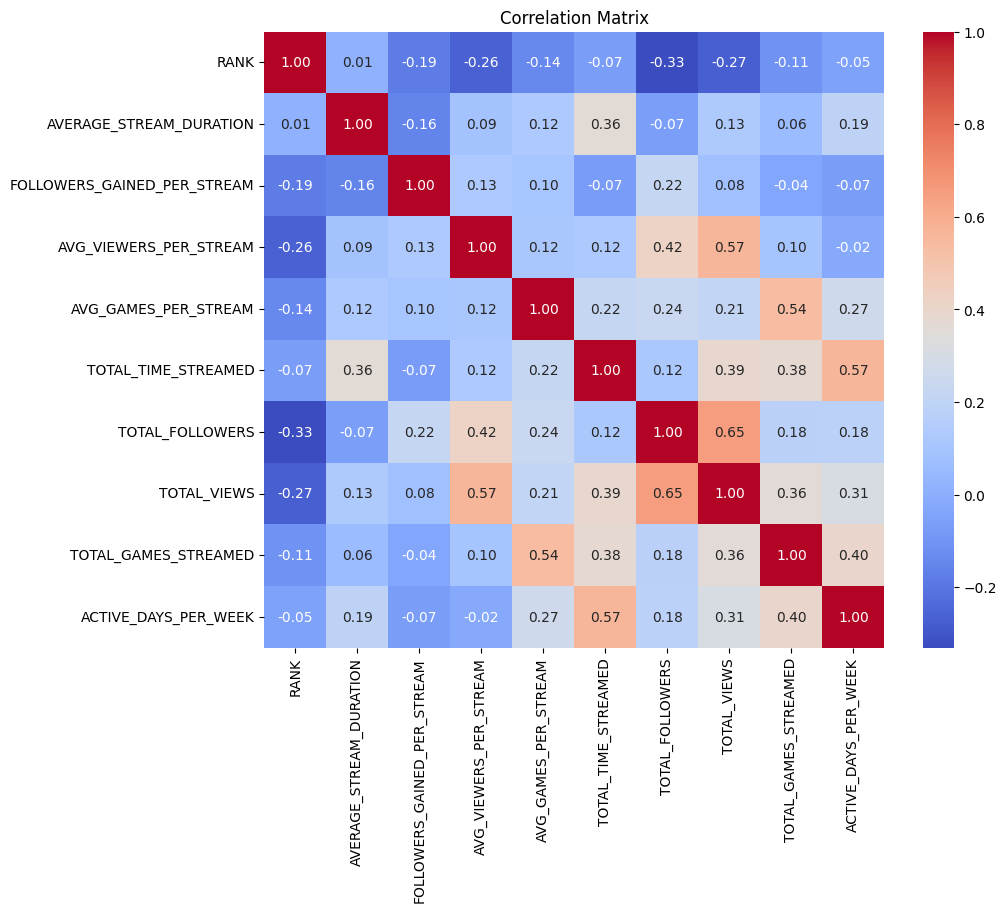

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


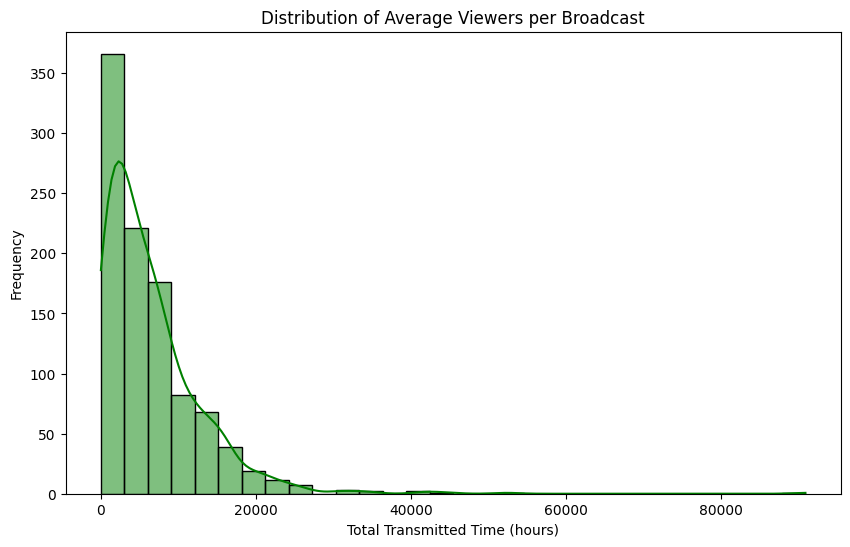

In [14]:
# Key distributions
# ---
# Time transmitted: 

plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL_TIME_STREAMED'], bins=30, kde=True, color='green')
plt.title('Distribution of Average Viewers per Broadcast')
plt.xlabel('Total Transmitted Time (hours)')
plt.ylabel('Frequency')
plt.show()  # The distribution of total transmitted time shows the frequency of streaming hours among streamers.
# Most streamers fall within a specific range, indicating a common pattern in broadcast duration.
# A long tail suggests some streamers broadcast significantly longer than average.
# This helps understand how streaming time may influence average viewers per broadcast.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


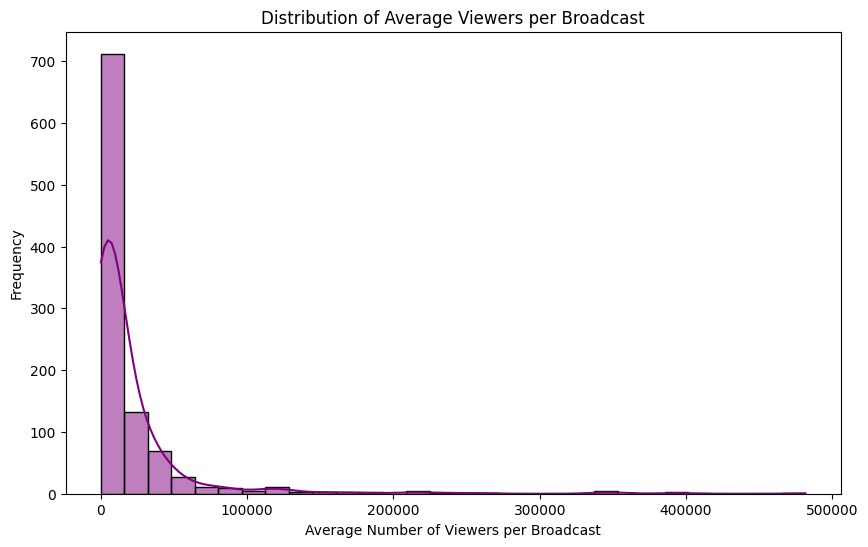

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AVG_VIEWERS_PER_STREAM'], bins=30, kde=True, color='purple')
plt.title('Distribution of Average Viewers per Broadcast')
plt.xlabel('Average Number of Viewers per Broadcast')
plt.ylabel('Frequency')
plt.show()   # The distribution of average viewers per broadcast shows the frequency of viewer counts across streams.
# Most streams have a moderate number of viewers, with a concentration in a specific range.
# A long tail indicates a few streams with significantly higher viewer counts, likely representing popular or viral broadcasts.


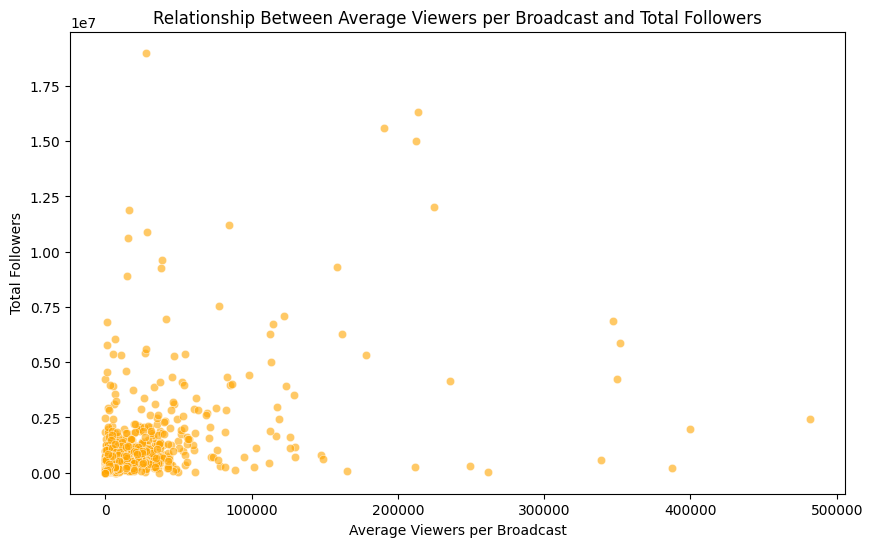

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVG_VIEWERS_PER_STREAM', y='TOTAL_FOLLOWERS', data=df, alpha=0.6, color='orange')
plt.title('Relationship Between Average Viewers per Broadcast and Total Followers')
plt.xlabel('Average Viewers per Broadcast')
plt.ylabel('Total Followers')
plt.show()   # The scatter plot shows the relationship between average viewers per broadcast and total followers.
# There is a positive correlation, indicating that streamers with more followers tend to have higher average viewer counts.
# Some outliers may represent streamers with high engagement despite a lower follower count, possibly due to viral content or niche audiences.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


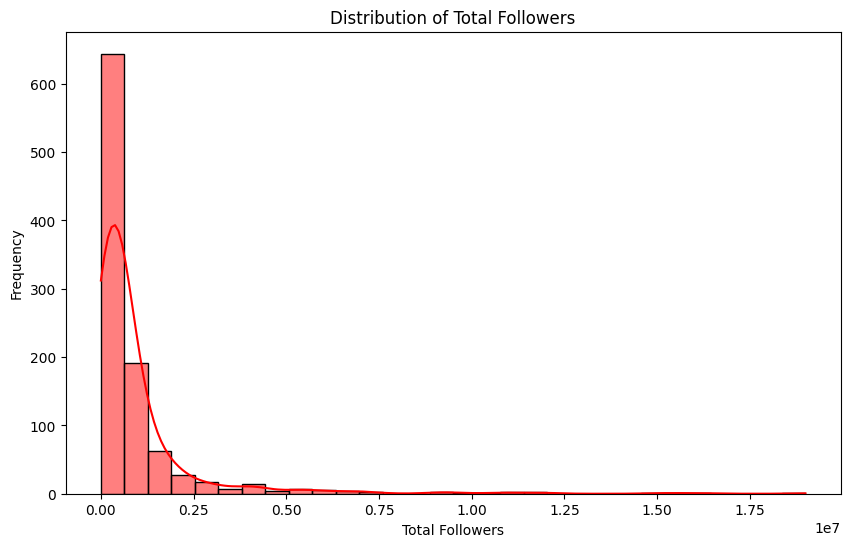

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL_FOLLOWERS'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Followers')
plt.xlabel('Total Followers')
plt.ylabel('Frequency')
plt.show()   # The distribution of total followers shows the frequency of follower counts among streamers.
# Most streamers have a moderate number of followers, with a concentration in a specific range.
# A long tail indicates a few streamers with significantly higher follower counts, likely representing popular or well-established creators.

In [18]:
# 8. Days of activity
# ---

print("\nMost Active Days:")
most_active_days = df['MOST_ACTIVE_DAY'].value_counts()
print(most_active_days)   # The analysis of the most active days shows the distribution of days when streamers are most active.
# Tuesday and Wednesday are the most popular days for streaming, followed closely by Thursday.
# Weekends (Saturday and Sunday) and early weekdays (Monday and Friday) have slightly lower activity levels.


Most Active Days:
MOST_ACTIVE_DAY
Tuesday      183
Wednesday    176
Thursday     144
Saturday     132
Sunday       129
Monday       118
Friday       117
Name: count, dtype: int64


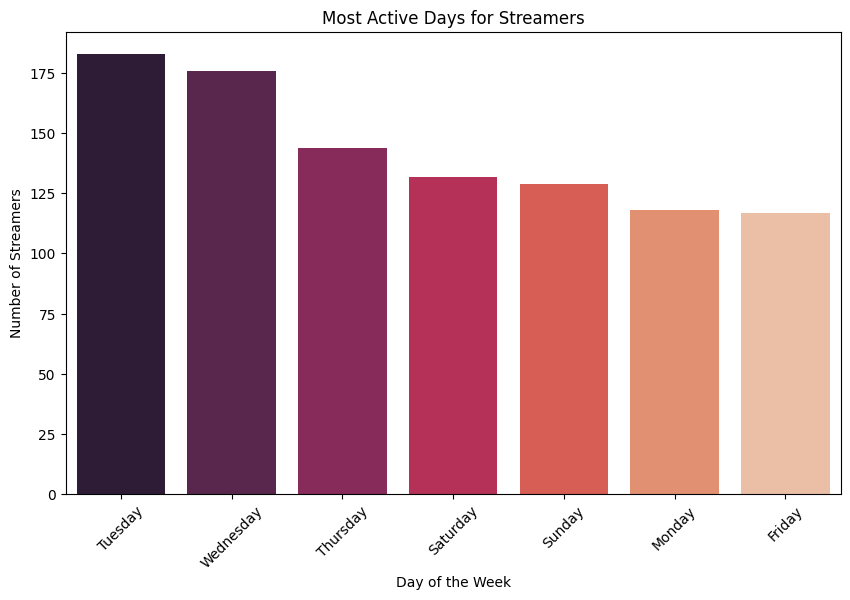

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=most_active_days.index, y=most_active_days.values, palette="rocket")
plt.title('Most Active Days for Streamers')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45)
plt.show()